#### Imports

In [15]:
# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt

#Personal Imports
from wrangle import get_tokyo, clean_tokyo, prep_tokyo, wrangle_tokyo

### The csv used in the wrangle script can be found <a href="https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByMajorCity.csv">here</a>

### Wrangle

In [16]:
tokyo = get_tokyo()
tokyo.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
227665,1845-01-01,2.377,2.006,Tokyo,Japan,36.17N,139.23E
227666,1845-02-01,1.312,2.968,Tokyo,Japan,36.17N,139.23E
227667,1845-03-01,5.276,1.506,Tokyo,Japan,36.17N,139.23E
227668,1845-04-01,10.387,1.508,Tokyo,Japan,36.17N,139.23E
227669,1845-05-01,14.923,1.448,Tokyo,Japan,36.17N,139.23E


In [17]:
tokyo.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2025 entries, 227665 to 229689
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             2025 non-null   object 
 1   AverageTemperature             2020 non-null   float64
 2   AverageTemperatureUncertainty  2020 non-null   float64
 3   City                           2025 non-null   object 
 4   Country                        2025 non-null   object 
 5   Latitude                       2025 non-null   object 
 6   Longitude                      2025 non-null   object 
dtypes: float64(2), object(5)
memory usage: 126.6+ KB


In [18]:
tokyo.isnull().sum()

dt                               0
AverageTemperature               5
AverageTemperatureUncertainty    5
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

### Preperation


In [19]:
tokyo = clean_tokyo(tokyo)
tokyo

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
227665,1845-01-01,2.377000,2.006000,Tokyo,Japan,36.17N,139.23E
227666,1845-02-01,1.312000,2.968000,Tokyo,Japan,36.17N,139.23E
227667,1845-03-01,5.276000,1.506000,Tokyo,Japan,36.17N,139.23E
227668,1845-04-01,10.387000,1.508000,Tokyo,Japan,36.17N,139.23E
227669,1845-05-01,14.923000,1.448000,Tokyo,Japan,36.17N,139.23E
...,...,...,...,...,...,...,...
229685,2013-05-01,16.757000,0.396000,Tokyo,Japan,36.17N,139.23E
229686,2013-06-01,20.927000,0.489000,Tokyo,Japan,36.17N,139.23E
229687,2013-07-01,24.645000,0.404000,Tokyo,Japan,36.17N,139.23E
229688,2013-08-01,26.364000,0.461000,Tokyo,Japan,36.17N,139.23E


In [20]:
tokyo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2025 entries, 227665 to 229689
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             2025 non-null   object 
 1   AverageTemperature             2025 non-null   float64
 2   AverageTemperatureUncertainty  2025 non-null   float64
 3   City                           2025 non-null   object 
 4   Country                        2025 non-null   object 
 5   Latitude                       2025 non-null   object 
 6   Longitude                      2025 non-null   object 
dtypes: float64(2), object(5)
memory usage: 126.6+ KB


In [21]:
tokyo.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [22]:
tokyo = prep_tokyo(tokyo)


In [23]:
tokyo.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,month,year
dt,,,,,,,,
1845-01-01,2.377,2.006,Tokyo,Japan,36.17N,139.23E,January,1845
1845-02-01,1.312,2.968,Tokyo,Japan,36.17N,139.23E,February,1845
1845-03-01,5.276,1.506,Tokyo,Japan,36.17N,139.23E,March,1845
1845-04-01,10.387,1.508,Tokyo,Japan,36.17N,139.23E,April,1845
1845-05-01,14.923,1.448,Tokyo,Japan,36.17N,139.23E,May,1845


In [36]:
tokyo = tokyo.drop(columns=['City','Country','Latitude','Longitude'])
tokyo.head()

,AverageTemperature,AverageTemperatureUncertainty,month,year
dt,,,,
1845-01-01,2.377,2.006,January,1845
1845-02-01,1.312,2.968,February,1845
1845-03-01,5.276,1.506,March,1845
1845-04-01,10.387,1.508,April,1845
1845-05-01,14.923,1.448,May,1845


In [37]:
tokyo.tail()

,AverageTemperature,AverageTemperatureUncertainty,month,year
dt,,,,
2013-05-01,16.757000,0.396000,May,2013
2013-06-01,20.927000,0.489000,June,2013
2013-07-01,24.645000,0.404000,July,2013
2013-08-01,26.364000,0.461000,August,2013
2013-09-01,12.555998,0.612745,September,2013


### Initial Takeaways
- 1845 -2013(168 yeas worth of temperature data)
- May prove tricky when resampling daily, weekly, and maybe even monthly.
- Temperature appears to be in celsius, will either convert to fahrenheit  or keep as is.

## Spliting the Data

In [38]:
# set train size to be 50% of total 
train_size = int(len(tokyo) * .5)
train_size

1012

In [39]:
# set validate size to be 30% of total 
validate_size = int(len(tokyo) * .3)
validate_size

607

In [40]:
# set test size to be number of rows remaining. 
test_size = int(len(tokyo) - train_size - validate_size)
test_size

406

In [41]:
# validate will go from 1012 to 1012 + 607
validate_end_index = train_size + validate_size
validate_end_index

1619

Use those values to split our dataframe

In [42]:
# train will go from 0 to 1011
train = tokyo[: train_size]
# validate will go from 1013 to 1618
validate = tokyo[train_size:validate_end_index]
# test will include 1619 to the end
test = tokyo[validate_end_index:]

**Verify Splits**

Does the length of each df equate to the length of the original df?

In [43]:
# is len of train + validate + test == lenght of entire dataframe. 
print(len(train) + len(validate) + len(test) == len(tokyo))

True


Does the first row of original df equate to the first row of train?

In [44]:
print(tokyo.head(1) == train.head(1))

            AverageTemperature  AverageTemperatureUncertainty  month  year
dt                                                                        
1845-01-01                True                           True   True  True


Is the last row of train the day before the first row of validate? And the same for validate to test?

In [45]:
pd.concat([train.tail(1), validate.head(1)])

,AverageTemperature,AverageTemperatureUncertainty,month,year
dt,,,,
1929-04-01,10.586,0.280,April,1929
1929-05-01,14.398,0.287,May,1929


In [46]:
train.columns

Index(['AverageTemperature', 'AverageTemperatureUncertainty', 'month', 'year'], dtype='object')

In [47]:
temp_cols = ['AverageTemperature','AverageTemperatureUncertainty']

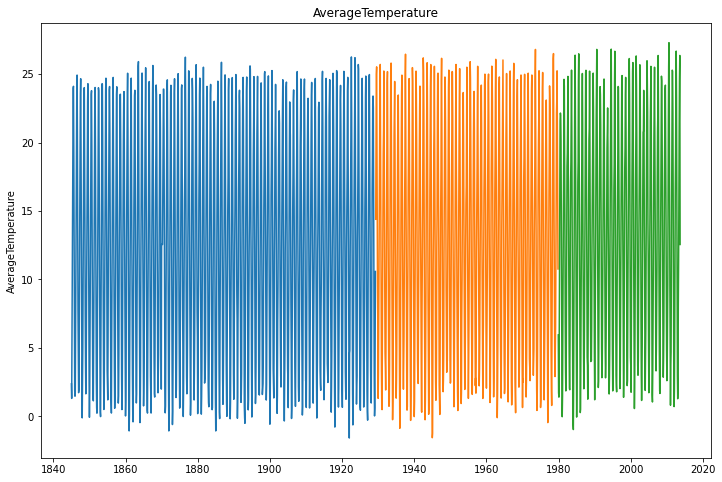

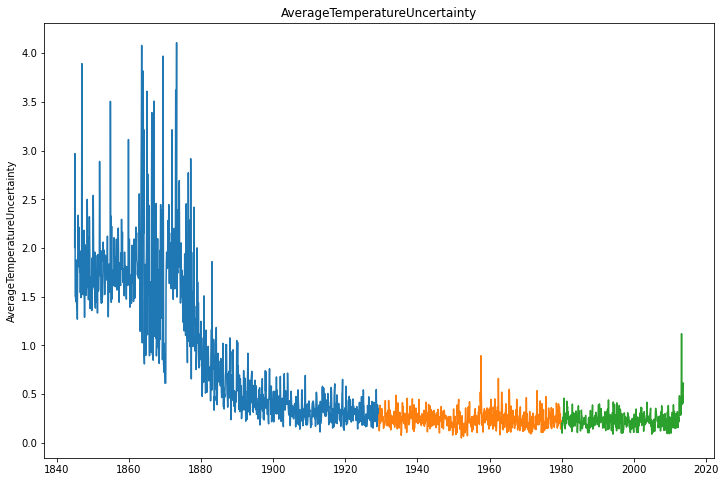

In [48]:
for col in train[temp_cols]:
    plt.figure(figsize=(12,8))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

array([[<AxesSubplot:title={'center':'AverageTemperature'}>,
        <AxesSubplot:title={'center':'AverageTemperatureUncertainty'}>]],
      dtype=object)

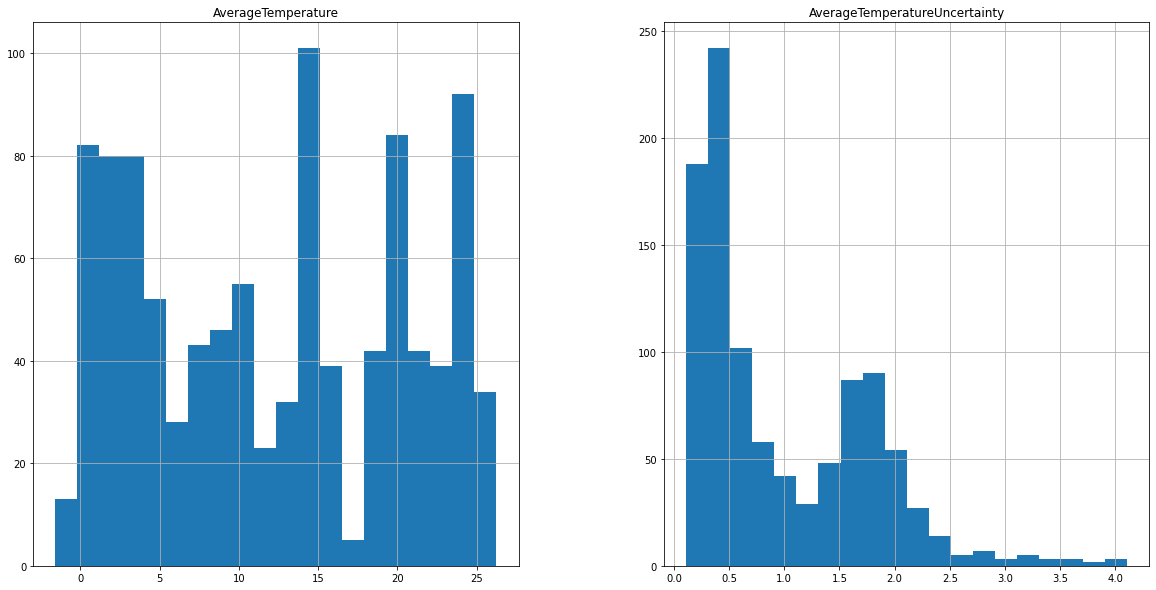

In [55]:
train[temp_cols].hist(bins=20,figsize=(20,10))


<AxesSubplot:xlabel='month'>

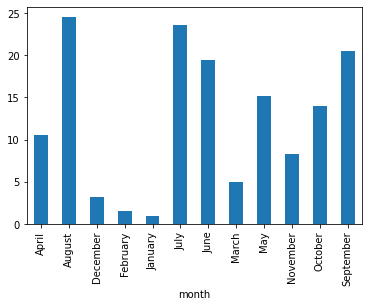

In [56]:
train.groupby('month').AverageTemperature.mean().plot.bar()


<AxesSubplot:xlabel='year'>

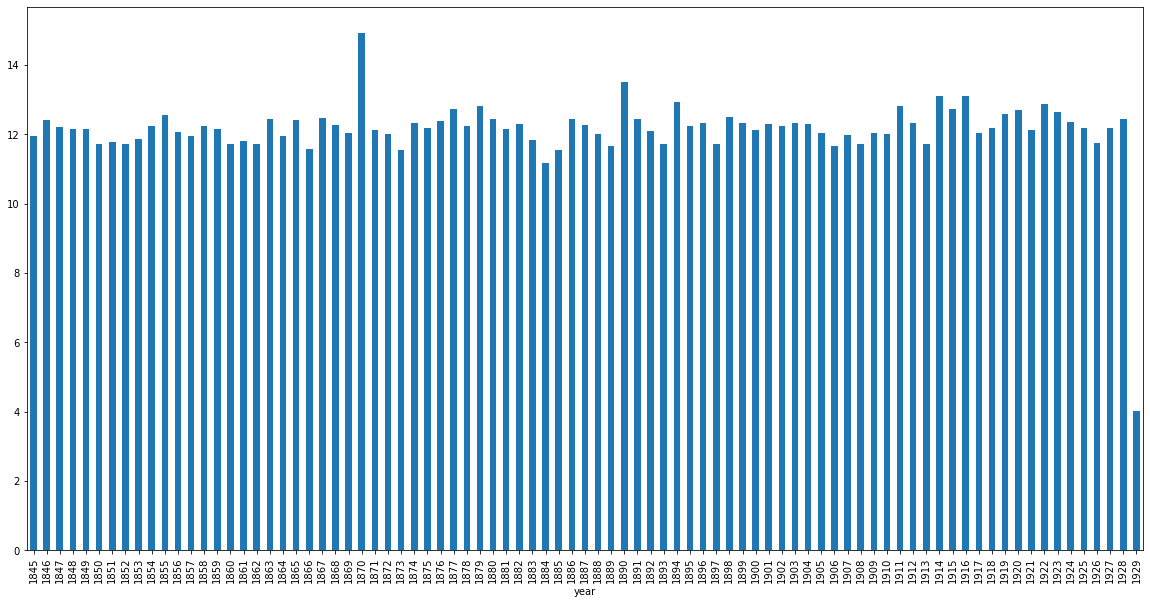

In [65]:
train.groupby('year').AverageTemperature.mean().plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='month'>

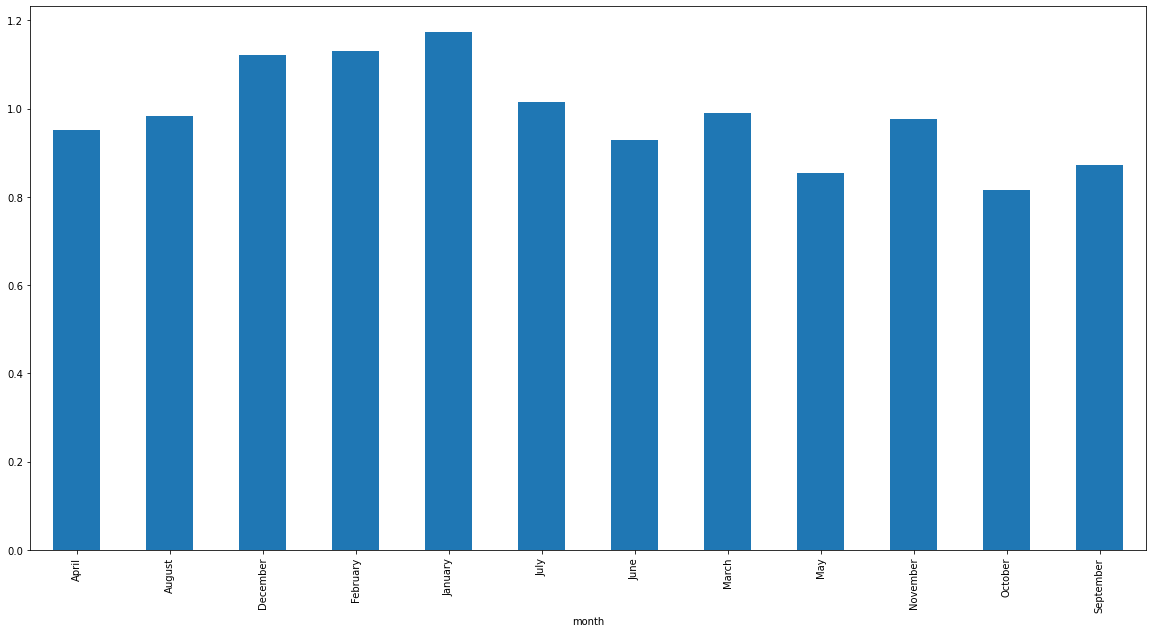

In [70]:
train.groupby('month').AverageTemperatureUncertainty.mean().plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='year'>

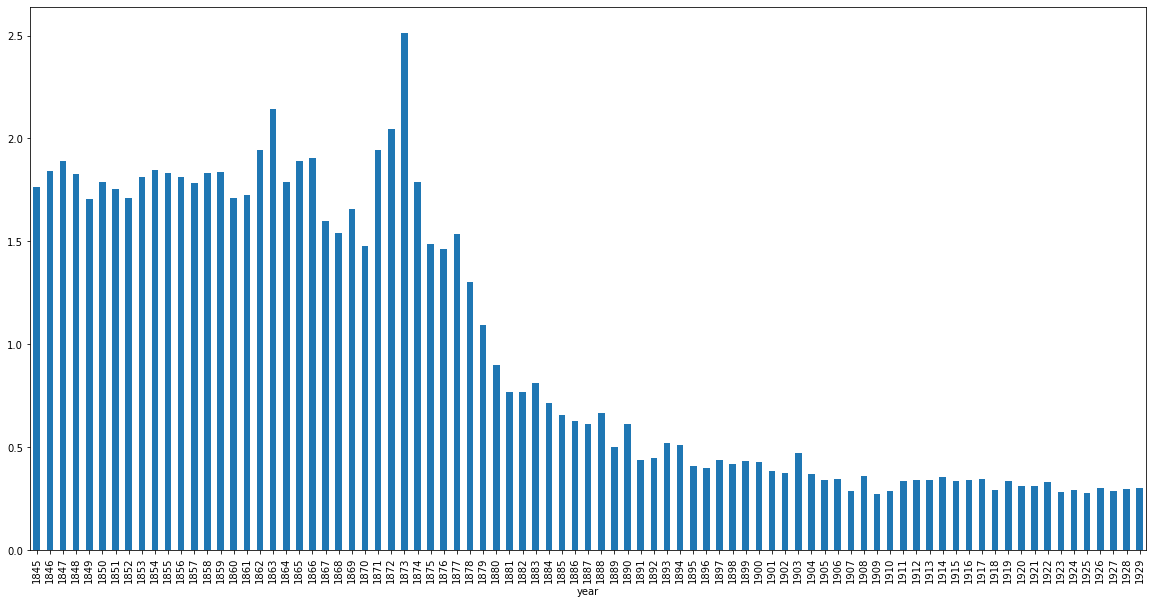

In [71]:
train.groupby('year').AverageTemperatureUncertainty.mean().plot.bar(figsize=(20,10))

- 1873 was hot!!!


<AxesSubplot:xlabel='month', ylabel='AverageTemperature'>

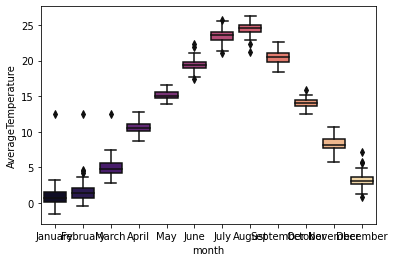

In [72]:
sns.boxplot(data = train, x='month', y='AverageTemperature', palette='magma')

<AxesSubplot:xlabel='year', ylabel='AverageTemperature'>

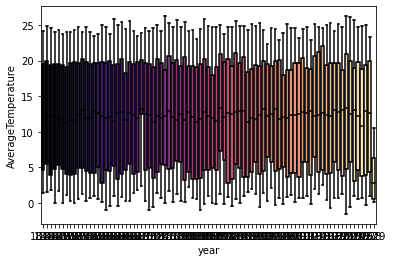

In [74]:
sns.boxplot(data = train, x='year', y='AverageTemperature', palette='magma')

- should probably go back to prepare and group by decade rather than year

In [75]:
train['decade'] = train.year.astype(str).apply(lambda x: x[:3] + '0').astype(int)

<AxesSubplot:xlabel='decade'>

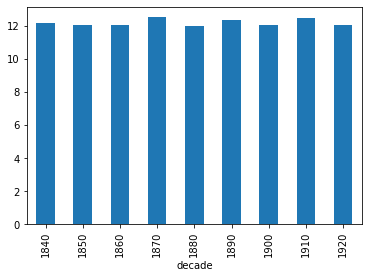

In [76]:
train.groupby('decade').AverageTemperature.mean().plot.bar()



<AxesSubplot:xlabel='decade'>

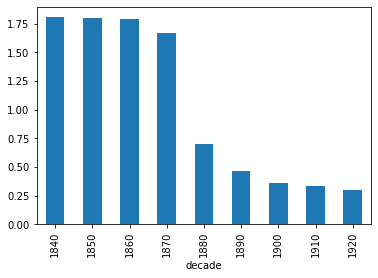

In [77]:
train.groupby('decade').AverageTemperatureUncertainty.mean().plot.bar()

<AxesSubplot:xlabel='decade', ylabel='AverageTemperature'>

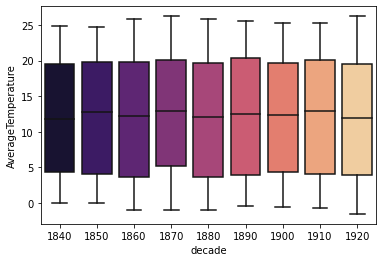

In [78]:
sns.boxplot(data = train, x='decade', y='AverageTemperature', palette='magma')

<AxesSubplot:xlabel='decade', ylabel='AverageTemperatureUncertainty'>

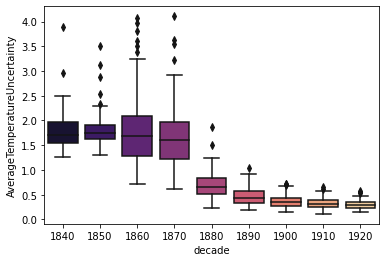

In [79]:
sns.boxplot(data = train, x='decade', y='AverageTemperatureUncertainty', palette='magma')

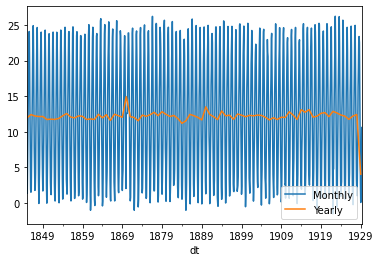

In [80]:
# resampling by Month + Year for average temperatue
train.resample('M').mean().AverageTemperature.plot(label = 'Monthly')
train.resample('Y').mean().AverageTemperature.plot(label = 'Yearly')
plt.legend()

#Aggregate
train.resample('Y').AverageTemperature.agg(['min','mean','max']).plot()

## Exploration Takeaways

`evaluate()` will compute the Mean Squared Error and the Rood Mean Squared Error to evaluate.

In [83]:
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

`plot_and_eval()` will use the evaluate function and also plot train and test values with the predicted values in order to compare performance. 

In [84]:
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

Write `append_eval_df(model_type)` to append evaluation metrics for each model type, target variable, and metric type, along with the metric value into our `eval_df` data frame object. Which we will create an empty `eval_df` dataframe object to start. 

In [85]:
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

,model_type,target_var,rmse


In [86]:
# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [87]:
eval_df

,model_type,target_var,rmse


### Make Predictions

In [90]:
# take average temperature and assign to variable
avg_temps = round(train['AverageTemperature'][-1:][0], 2)
avg_temps

10.59

In [92]:
# take average temperature uncertainty and assign to variable
avg_temp_uncert = round(train['AverageTemperatureUncertainty'][-1:][0], 2)
avg_temp_uncert

0.28

In [ ]:
yhat_df = pd.DataFrame({'dollars_sold': [dollars], 
                        'items_sold': [items]}, 
                      index = validate.index)

yhat_df.head()